(Deprecated) Create a dataset with shift based on the two moons dataset. Verify the label balance as well.

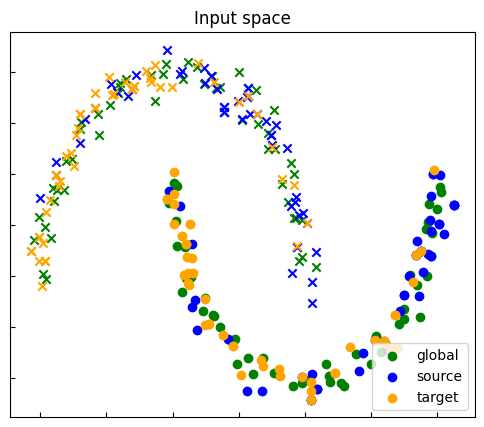

Global: 0.5, Source: 0.5, Target: 0.5


In [4]:
from datagen.datagen import make_moons_triplet
from datagen.visualize import visualize_shift2d
import numpy as np

xs,ys,xg,yg,xt,yt = make_moons_triplet(force_balance=True)
visualize_shift2d(xs,ys,xg,yg,xt,yt)
print(f"Global: {np.mean(yg)}, Source: {np.mean(ys)}, Target: {np.mean(yt)}")

Create several datasets with the builder and visualize

In [5]:
from datagen.covshift.selector import  FeatureSelector
from datagen.covshift.builder import  CovShiftBuilder
from datagen.visualize import visualize_shift2d_px, visualize_shift3d_px
from evaluate.evaluate import analyze_data

# configure dataset generation
init_classification = dict(n_samples=500, n_features=2, n_informative=2, n_repeated=0, n_redundant=0)
selector = FeatureSelector(n_global=100, n_source=100, n_target=100, source_scale=1, target_scale=1, bias_dist=2)
builder = CovShiftBuilder(init_classification, selector)

runs = 1
for _ in range(runs):
    data = builder.generate()
    visualize_shift2d_px(*data)
    metrics = analyze_data(data)
    for key in metrics:
        print(f"{key}: {metrics[key]}")

num-global: 100
uniqueness-global: 1.0
class-marginal-global: 0.42
num-source: 100
uniqueness-source: 0.78
class-marginal-source: 0.65
num-target: 100
uniqueness-target: 0.72
class-marginal-target: 0.4


In [9]:
from datagen.conceptshift.selector import DomainSelector
from datagen.conceptshift.shifter import Shifter
from datagen.conceptshift.builder import ConceptShiftDataBuilder
from datagen.visualize import visualize_shift2d_px, visualize_shift3d_px
from evaluate.evaluate import analyze_data

# configure dataset generation
init_classification = dict(n_samples=5000, n_features=2, n_informative=2, n_repeated=0, n_redundant=0)
shifter = Shifter(n_domains=2, rot=.25, trans=1, scale=2)
selector = DomainSelector(n_global=1000, n_source=1000, n_target=1000, n_domains_source=1, n_domains_target=1)

builder = ConceptShiftDataBuilder(init_classification, shifter, selector)

runs = 4
for _ in range(runs):
    data = builder.generate()
    visualize_shift2d_px(*data)
    metrics = analyze_data(data)
    for key in metrics:
        print(f"{key}: {metrics[key]}")

num-global: 1000
uniqueness-global: 1.0
class-marginal-global: 0.487
num-source: 1000
uniqueness-source: 0.485
class-marginal-source: 0.535
num-target: 1000
uniqueness-target: 0.515
class-marginal-target: 0.482


num-global: 1000
uniqueness-global: 1.0
class-marginal-global: 0.5
num-source: 1000
uniqueness-source: 0.487
class-marginal-source: 0.494
num-target: 1000
uniqueness-target: 0.513
class-marginal-target: 0.481


num-global: 1000
uniqueness-global: 1.0
class-marginal-global: 0.507
num-source: 1000
uniqueness-source: 0.52
class-marginal-source: 0.502
num-target: 1000
uniqueness-target: 0.48
class-marginal-target: 0.513


num-global: 1000
uniqueness-global: 1.0
class-marginal-global: 0.502
num-source: 1000
uniqueness-source: 0.509
class-marginal-source: 0.549
num-target: 1000
uniqueness-target: 0.491
class-marginal-target: 0.516
